Miguel Angel Gómez

### Tarea 1 

In [3]:
#pip install PyMuPDF

Importando paquetes

In [4]:
import matplotlib.pyplot as plt
import fitz #paquete para la lectura de pdf
import re
import unicodedata

**Importando documento pdf**

In [5]:
documento_pdf= "VMM10-1_18-ENE-22.pdf"
documento = fitz.open(documento_pdf)


Cargando la página 1 del pdf del contrato de hidrocarburos VMM-10 de enero de 2022

In [6]:
pagina= documento.load_page(1)
text=pagina.get_text("text")
text

'Página 2 de 5\nLos contratantes, a saber:\nPor una parte, la Agencia Nacional de Hidrocarburos, en adelante ANH, entidad estatal del sector\ndescentralizado de la Rama Ejecutiva del orden nacional, con personería jurídica, patrimonio propio y\nautonomía administrativa, técnica y financiera, adscrita al Ministerio de Minas y Energía, creada por\nel Decreto Ley 1760 de junio 26 de 2003, y modificada su naturaleza jurídica por el Decreto 4137 de\n2011, desarrollado por el Decreto 714 de 2012; con domicilio principal en la ciudad de Bogotá, D.C.;\nrepresentada legalmente por José Armando Zamora Reyes, mayor de edad, identificado con la Cédula\nde Ciudadanía No.l9.303.0I7 expedida en Bogotá D.C., cargo para el cual fue designado mediante\nDecreto 378 del 11 de marzo del año 2020, del que tomó posesión el 12 de marzo de 2020, según\nconsta en Acta de Posesión No. 018 de 2020; debidamente facultado para celebrar este negocio jurídico\npor los numerales 1,3 y 17 del artículo 9 del Decreto 714

### Limpieza

Limpiando las tildes y caracteres especiales del texto a trabajar 

In [7]:
text1 = unicodedata.normalize("NFKD", text).encode("ascii","ignore").decode("ascii")#limpiando tildes

In [8]:
text = re.sub(r'[\t\n\r\f\v,\;//.\\:+\"!]', ' ', text1) #reemplazando caracteres especiales por escacios

In [9]:
text #texto limpiado

"Pagina 2 de 5 Los contratantes  a saber  Por una parte  la Agencia Nacional de Hidrocarburos  en adelante ANH  entidad estatal del sector descentralizado de la Rama Ejecutiva del orden nacional  con personeria juridica  patrimonio propio y autonomia administrativa  tecnica y financiera  adscrita al Ministerio de Minas y Energia  creada por el Decreto Ley 1760 de junio 26 de 2003  y modificada su naturaleza juridica por el Decreto 4137 de 2011  desarrollado por el Decreto 714 de 2012  con domicilio principal en la ciudad de Bogota  D C   representada legalmente por Jose Armando Zamora Reyes  mayor de edad  identificado con la Cedula de Ciudadania No l9 303 0I7 expedida en Bogota D C   cargo para el cual fue designado mediante Decreto 378 del 11 de marzo del ano 2020  del que tomo posesion el 12 de marzo de 2020  segun consta en Acta de Posesion No  018 de 2020  debidamente facultado para celebrar este negocio juridico por los numerales 1 3 y 17 del articulo 9 del Decreto 714 de 2012  y

1. STOP WORDS

In [10]:
from stop_words import get_stop_words# importando paquetes para stop words

In [11]:
stop_words_español=get_stop_words('es') #obteniendo stop words en español

In [12]:
#agregando palabras a la lista de stop words
lista=["de","d","D","c","C","0i7","_","09","n","14","23","38","l9","ix","018","14","17","11","2","5","26","36","80","25","26","9"]
for i in lista:
    stop_words_español.append(i)

In [13]:
stop_words_español #imprimiendo lista de stopwords

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Obteniendo la frecuencia de cada una de las palabras sin stop words

In [14]:
frecuencias={}
for palabra in text.lower().split():
    if palabra not in stop_words_español:
        if palabra in frecuencias:
            frecuencias[palabra]+=1
        else:
            frecuencias[palabra]=1
print(frecuencias)

{'pagina': 1, 'contratantes': 1, 'saber': 1, 'parte': 2, 'agencia': 1, 'nacional': 2, 'hidrocarburos': 3, 'adelante': 3, 'anh': 4, 'entidad': 3, 'estatal': 1, 'sector': 1, 'descentralizado': 1, 'rama': 1, 'ejecutiva': 1, 'orden': 1, 'personeria': 1, 'juridica': 2, 'patrimonio': 1, 'propio': 1, 'autonomia': 1, 'administrativa': 1, 'tecnica': 1, 'financiera': 1, 'adscrita': 1, 'ministerio': 1, 'minas': 1, 'energia': 1, 'creada': 1, 'decreto': 5, 'ley': 1, '1760': 1, 'junio': 1, '2003': 1, 'modificada': 1, 'naturaleza': 1, '4137': 1, '2011': 1, 'desarrollado': 1, '714': 2, '2012': 2, 'domicilio': 2, 'principal': 2, 'ciudad': 2, 'bogota': 5, 'representada': 2, 'legalmente': 1, 'jose': 1, 'armando': 1, 'zamora': 1, 'reyes': 1, 'mayor': 1, 'edad': 1, 'identificado': 2, 'cedula': 2, 'ciudadania': 2, '303': 1, 'expedida': 2, 'cargo': 1, 'designado': 1, 'mediante': 3, '378': 1, 'marzo': 4, 'ano': 2, '2020': 3, 'tomo': 1, 'posesion': 2, '12': 2, 'segun': 3, 'consta': 5, 'acta': 5, 'debidamente':

In [15]:
#dic_frec={"palabras":frecuencias}
#df_frec=pd.DataFrame(dic_frec)
#df_frec_1 = df_frec[df_frec['palabras'] == 1]

Gráfica de frecuencia de palabras

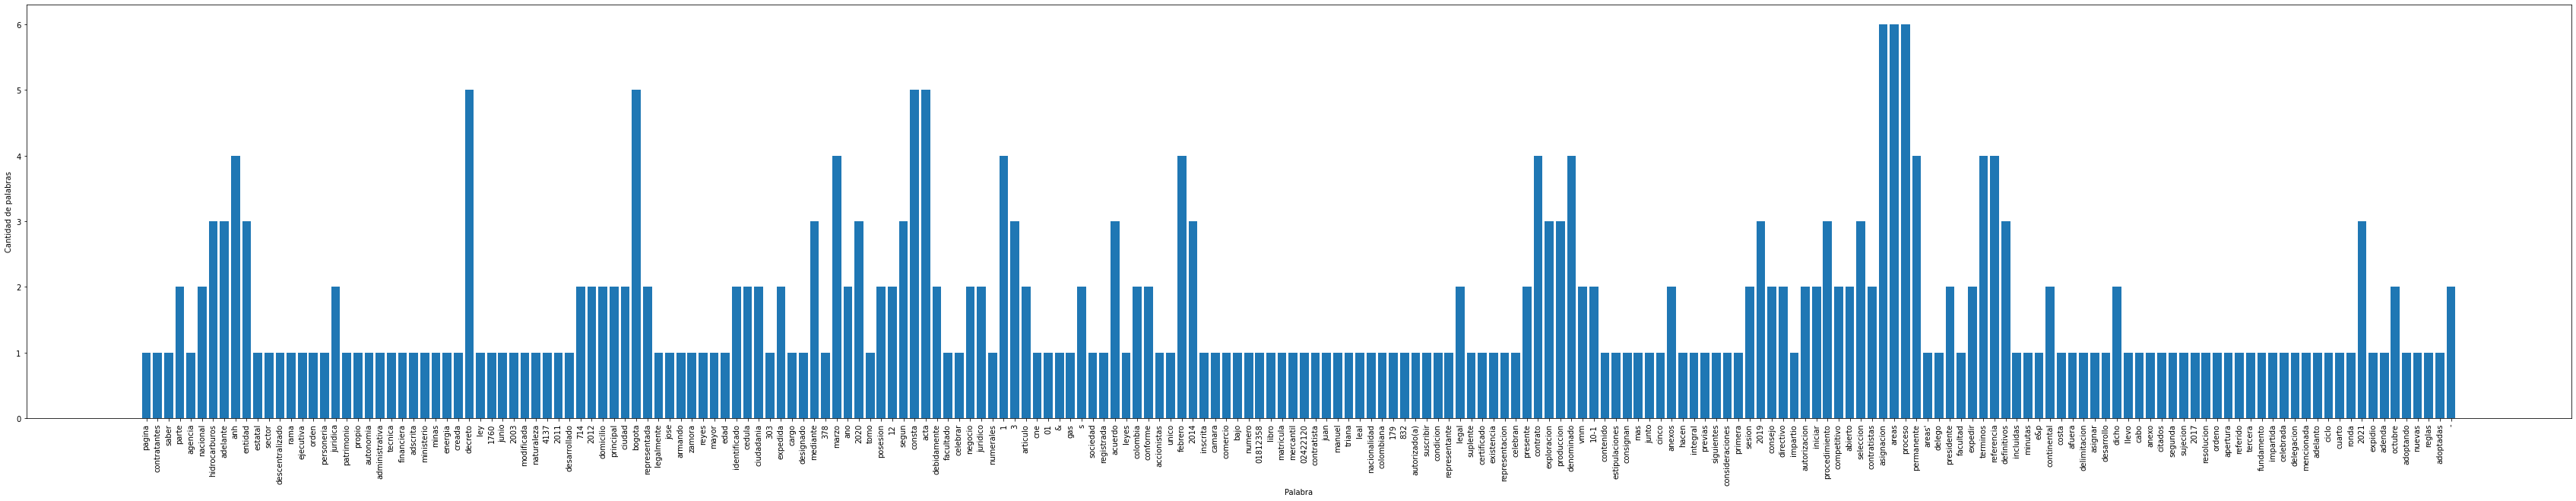

In [16]:
plt.figure(figsize=(60,10))
plt.bar(range(len(frecuencias)), list(frecuencias.values()), align='center')
plt.xticks(range(len(frecuencias)), list(frecuencias.keys()),rotation=90)
plt.xlabel("Palabra")
plt.ylabel("Cantidad de palabras")
plt.show()

2. Función de Lematizacion

In [17]:
#!python -m spacy download es_core_news_sm

In [18]:
# Importando paquetes para la lematización
import nltk
from nltk import SnowballStemmer
import spacy
import spacy_spanish_lemmatizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

In [19]:
# Change "es" to the Spanish model installed in step 2
nlp = spacy.load("es_core_news_sm")

In [20]:
# Inicialización del lematizador de WordNet
lemmatizer = WordNetLemmatizer()

In [21]:
doc = nlp(text)
doc

Pagina 2 de 5 Los contratantes  a saber  Por una parte  la Agencia Nacional de Hidrocarburos  en adelante ANH  entidad estatal del sector descentralizado de la Rama Ejecutiva del orden nacional  con personeria juridica  patrimonio propio y autonomia administrativa  tecnica y financiera  adscrita al Ministerio de Minas y Energia  creada por el Decreto Ley 1760 de junio 26 de 2003  y modificada su naturaleza juridica por el Decreto 4137 de 2011  desarrollado por el Decreto 714 de 2012  con domicilio principal en la ciudad de Bogota  D C   representada legalmente por Jose Armando Zamora Reyes  mayor de edad  identificado con la Cedula de Ciudadania No l9 303 0I7 expedida en Bogota D C   cargo para el cual fue designado mediante Decreto 378 del 11 de marzo del ano 2020  del que tomo posesion el 12 de marzo de 2020  segun consta en Acta de Posesion No  018 de 2020  debidamente facultado para celebrar este negocio juridico por los numerales 1 3 y 17 del articulo 9 del Decreto 714 de 2012  y 

In [22]:
lemmas = [tok.lemma_.lower() for tok in doc]
lemmas

['pagina',
 '2',
 'de',
 '5',
 'el',
 'contratant',
 ' ',
 'a',
 'saber',
 ' ',
 'por',
 'uno',
 'parte',
 ' ',
 'el',
 'agencia',
 'nacional',
 'de',
 'hidrocarburos',
 ' ',
 'en',
 'adelante',
 'anh',
 ' ',
 'entidad',
 'estatal',
 'del',
 'sector',
 'descentralizado',
 'de',
 'el',
 'rama',
 'ejecutiva',
 'del',
 'orden',
 'nacional',
 ' ',
 'con',
 'personeria',
 'juridico',
 ' ',
 'patrimonio',
 'propio',
 'y',
 'autonomia',
 'administrativo',
 ' ',
 'tecnico',
 'y',
 'financiero',
 ' ',
 'adscritar',
 'al',
 'ministerio',
 'de',
 'minas',
 'y',
 'energia',
 ' ',
 'crear',
 'por',
 'el',
 'decreto',
 'ley',
 '1760',
 'de',
 'junio',
 '26',
 'de',
 '2003',
 ' ',
 'y',
 'modificar',
 'su',
 'naturaleza',
 'juridico',
 'por',
 'el',
 'decreto',
 '4137',
 'de',
 '2011',
 ' ',
 'desarrollado',
 'por',
 'el',
 'decreto',
 '714',
 'de',
 '2012',
 ' ',
 'con',
 'domicilio',
 'principal',
 'en',
 'el',
 'ciudad',
 'de',
 'bogota',
 ' ',
 'd',
 'c',
 '  ',
 'representado',
 'legalmente',
 '

3. Función de Steamming

In [23]:
def normalize(text):
    doc = nlp(text)
    words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and     
    t.isalpha()]
    return lexical_tokens
word_list = normalize(text)
print(word_list)

['pagina', 'contratantes', 'agencia', 'nacional', 'hidrocarburos', 'entidad', 'estatal', 'sector', 'descentralizado', 'rama', 'ejecutiva', 'orden', 'nacional', 'personeria', 'juridica', 'patrimonio', 'autonomia', 'administrativa', 'tecnica', 'financiera', 'adscrita', 'ministerio', 'minas', 'energia', 'creada', 'decreto', 'junio', 'modificada', 'naturaleza', 'juridica', 'decreto', 'desarrollado', 'decreto', 'domicilio', 'principal', 'ciudad', 'bogota', 'representada', 'legalmente', 'jose', 'armando', 'zamora', 'reyes', 'edad', 'identificado', 'cedula', 'ciudadania', 'expedida', 'bogota', 'cargo', 'designado', 'decreto', 'marzo', 'tomo', 'posesion', 'marzo', 'consta', 'acta', 'posesion', 'debidamente', 'facultado', 'celebrar', 'negocio', 'juridico', 'numerales', 'articulo', 'decreto', 'sociedad', 'registrada', 'leyes', 'colombia', 'conforme', 'acta', 'accionistas', 'unico', 'febrero', 'inscrita', 'camara', 'comercio', 'bogota', 'marzo', 'numero', 'libro', 'matricula', 'mercantil', 'marzo

In [24]:
spanishstemmer=SnowballStemmer("spanish")
tokens = normalize(text) # crear una lista de tokens
stems = [spanishstemmer.stem(token) for token in tokens]
stems

['pagin',
 'contrat',
 'agenci',
 'nacional',
 'hidrocarbur',
 'entid',
 'estatal',
 'sector',
 'descentraliz',
 'ram',
 'ejecut',
 'orden',
 'nacional',
 'personeri',
 'jurid',
 'patrimoni',
 'autonomi',
 'administr',
 'tecnic',
 'financ',
 'adscrit',
 'ministeri',
 'min',
 'energi',
 'cre',
 'decret',
 'juni',
 'modific',
 'naturalez',
 'jurid',
 'decret',
 'desarroll',
 'decret',
 'domicili',
 'principal',
 'ciud',
 'bogot',
 'represent',
 'legal',
 'jos',
 'armand',
 'zamor',
 'rey',
 'edad',
 'identific',
 'cedul',
 'ciudadani',
 'exped',
 'bogot',
 'carg',
 'design',
 'decret',
 'marz',
 'tom',
 'posesion',
 'marz',
 'const',
 'acta',
 'posesion',
 'debid',
 'facult',
 'celebr',
 'negoci',
 'jurid',
 'numeral',
 'articul',
 'decret',
 'socied',
 'registr',
 'ley',
 'colombi',
 'conform',
 'acta',
 'accion',
 'unic',
 'febrer',
 'inscrit',
 'cam',
 'comerci',
 'bogot',
 'marz',
 'numer',
 'libr',
 'matricul',
 'mercantil',
 'marz',
 'domicili',
 'principal',
 'ciud',
 'bogot',
 'c

4. Word Cloud

Word cloud es un tipo de gráfico bien interesante que dibuja las palabras de acuerdo a su frecuencia, cuando aparece muchas veces una palabra la dibuja más grande. 

In [25]:
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words

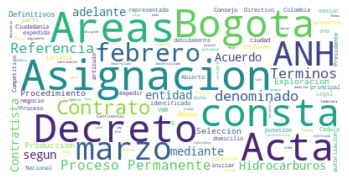

In [26]:
stop_words=get_stop_words("es")
wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

5. untimming 
Quitando el stimming

In [33]:
len(stems)

255

In [190]:
stems

['pagin',
 'contrat',
 'agenci',
 'nacional',
 'hidrocarbur',
 'entid',
 'estatal',
 'sector',
 'descentraliz',
 'ram',
 'ejecut',
 'orden',
 'nacional',
 'personeri',
 'jurid',
 'patrimoni',
 'autonomi',
 'administr',
 'tecnic',
 'financ',
 'adscrit',
 'ministeri',
 'min',
 'energi',
 'cre',
 'decret',
 'juni',
 'modific',
 'naturalez',
 'jurid',
 'decret',
 'desarroll',
 'decret',
 'domicili',
 'principal',
 'ciud',
 'bogot',
 'represent',
 'legal',
 'jos',
 'armand',
 'zamor',
 'rey',
 'edad',
 'identific',
 'cedul',
 'ciudadani',
 'exped',
 'bogot',
 'carg',
 'design',
 'decret',
 'marz',
 'tom',
 'posesion',
 'marz',
 'const',
 'acta',
 'posesion',
 'debid',
 'facult',
 'celebr',
 'negoci',
 'jurid',
 'numeral',
 'articul',
 'decret',
 'socied',
 'registr',
 'ley',
 'colombi',
 'conform',
 'acta',
 'accion',
 'unic',
 'febrer',
 'inscrit',
 'cam',
 'comerci',
 'bogot',
 'marz',
 'numer',
 'libr',
 'matricul',
 'mercantil',
 'marz',
 'domicili',
 'principal',
 'ciud',
 'bogot',
 'c

In [197]:
sin_stem = re.compile(r"\b(%s)\w+" % "|".join(re.escape(stems) for stems in stems))

print("sin_stem:", sin_stem.pattern)

for m in sin_stem.finditer(text):
    print(m[0])
        

sin_stem: \b(pagin|contrat|agenci|nacional|hidrocarbur|entid|estatal|sector|descentraliz|ram|ejecut|orden|nacional|personeri|jurid|patrimoni|autonomi|administr|tecnic|financ|adscrit|ministeri|min|energi|cre|decret|juni|modific|naturalez|jurid|decret|desarroll|decret|domicili|principal|ciud|bogot|represent|legal|jos|armand|zamor|rey|edad|identific|cedul|ciudadani|exped|bogot|carg|design|decret|marz|tom|posesion|marz|const|acta|posesion|debid|facult|celebr|negoci|jurid|numeral|articul|decret|socied|registr|ley|colombi|conform|acta|accion|unic|febrer|inscrit|cam|comerci|bogot|marz|numer|libr|matricul|mercantil|marz|domicili|principal|ciud|bogot|contrat|represent|juan|manuel|trian|leal|nacional|colombian|identific|cedul|ciudadani|exped|bogot|debid|suscrib|negoci|jurid|condicion|represent|legal|suplent|const|certific|existent|representacion|legal|celebr|present|contrat|exploracion|produccion|denomin|conten|estipul|consign|anex|integral|present|contrat|previ|siguient|consider|sesion|febrer|c